# Sheet 4 Exercise 2: Nonlinear Decision Network (Credits: 6)
Note: The notebook contains all problems parts of the second exercise. Please create the plots that are asked for in the notebook and type out the corresponding interpretations. All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

Consider a network consisting of two linear threshold neurons that inhibit each other. The inhibition strength is given by the parameter $c$, and the firing threshold by $\theta$. Together with respective input signals $s_1$ and $s_2$, the model is governed by the nonlinear differential equations
$$
\begin{align}
\tau \dot{u}_1(t) = - u_1 (t) - c[u_2 - \theta]_+ + s_1, \\
\tau \dot{u}_2(t) = - u_2 (t) - c[u_1 - \theta]_+ + s_2.
\end{align}
$$
The linear threshold function is defined by $[x]_+ := \max\{x,0\}$.

#### 2.1
Show that the network can be reparameterized in the standard form
$$
\begin{align}
\dot{\tilde{u}}_1(\tilde{t}) = - \tilde{u}_1 (\tilde{t}) - c[\tilde{u}_2(\tilde{t})]_+ + \tilde{s}_1, \\
\dot{\tilde{u}}_2(\tilde{t}) = - \tilde{u}_2 (\tilde{t}) - c[\tilde{u}_1(\tilde{t})]_+ + \tilde{s}_2.
\end{align}
$$

In the following, we drop the tildes and simply consider the standard form. Assume $c = 2$ and $s_1 = s_2 = 1$ (as written in the standard form).

#### 2.2
The system can now be written as 

$$
\dot{u} = - u - c\begin{pmatrix} 0&1\\1&0 \end{pmatrix}[u]_+ + s.
$$

Plot the vector field of the dynamical system as a quiver plot. What does the plot tell you about the dynamics of the system?

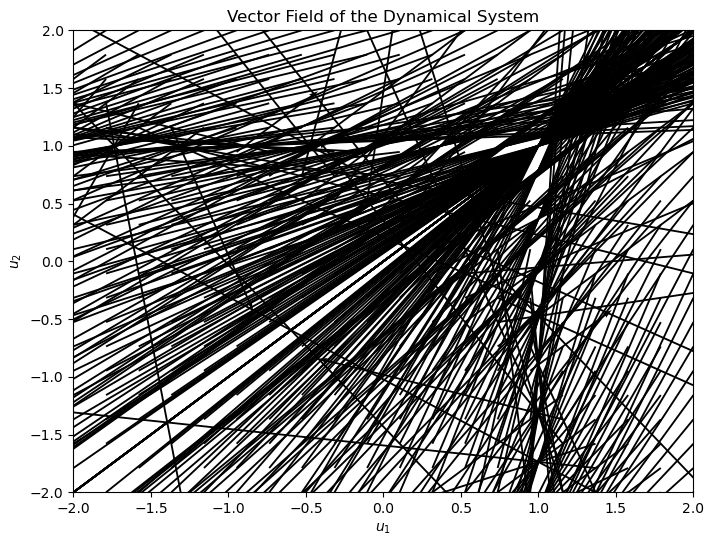

In [1]:
import numpy as np
import matplotlib.pyplot as plt
### CODE FOR YOUR PLOTS HERE ###

# Define the system parameters
c = 2
s = np.array([1, 1])

# Define the vector field for the system
def system(u):
    u1, u2 = u
    u1_pos = max(u1, 0)
    u2_pos = max(u2, 0)
    du1 = -u1 - c * u2_pos + s[0]
    du2 = -u2 - c * u1_pos + s[1]
    return np.array([du1, du2])

# Create a grid of points in the phase space
u1_vals = np.linspace(-2, 2, 20)
u2_vals = np.linspace(-2, 2, 20)
U1, U2 = np.meshgrid(u1_vals, u2_vals)

# Initialize arrays to store the vector field components
DU1 = np.zeros_like(U1)
DU2 = np.zeros_like(U2)

# Evaluate the system at each point in the grid
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        du = system(u)
        DU1[i, j] = du[0]
        DU2[i, j] = du[1]

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(U1, U2, DU1, DU2, angles='xy', scale_units='xy', scale=0.1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.title('Vector Field of the Dynamical System')
plt.grid(False)
plt.show()

### CODE FOR YOUR PLOTS HERE ###

**Interpretation:** 

#### 2.3
Note that inside any of the four quadrants, the linear threshold function is linear in both $u_1$ and $u_2$. Thus the whole system is piecewise linear. Compute the fixed points inside each quadrant by treating the system as a linear system restricted on each quadrant seperately, namely
1. $u_1$, $u_2 > 0$,
2. $u_1 > 0$, $u_2 \leq 0$,
3. $u_1 \leq 0$, $u_2 > 0$,
4. $u_1$, $u_2 \leq 0$.

Analyze the stability of the fixed points by computing the eigenvalues of the system matrix for each quadrant. How do the results relate to the plot observed in 2.2?

*Hint:* Note that the dynamics within a given quadrant may have fixed points *outside* of this quadrant. Of course, these are not relevant for us as different quadrants are governed by different dynamics.

**Explanation:** 

<div class="alert alert-block alert-info"> 

- In **Quadrant 1**, the fixed point is unstable because one of the eigenvalues is positive.
- In **Quadrants 2, 3, and 4**, the fixed points are stable because both eigenvalues are negative.

These results are consistent with the phase portrait observed in part 2.2, where the system dynamics show stability in some regions and instability in others.

</div>

#### 2.4
Consider asymmetrical inputs, namely
1. $s_1 = 1.5$, $s_2 = 1$,
2. $s_1 = 1$, $s_2 = 1.5$.

Using quiver and stream plots, analyze the (asymptotical) behaviour of the system for the initial conditions $(0,0)$, $(1,-1)$ and $(-1,1)$.

How do you interpret the behaviour in terms of neural decision mechanisms based on inputs $s_1$ and $s_2$?

*Hint:* The documentation for stream plots can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html. They are created in the same way as quiver plots and conveniently visualize the system's flow.

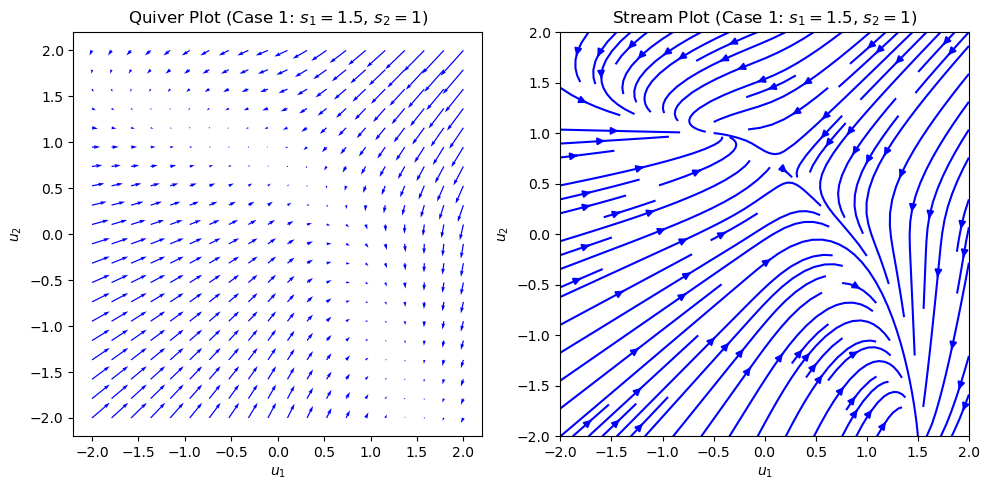

In [2]:
### CODE FOR YOUR PLOTS HERE ###

# Define the system of equations
def system(u, s1, s2):
    u1, u2 = u
    du1 = -u1 - 2 * max(u2, 0) + s1
    du2 = -u2 - 2 * max(u1, 0) + s2
    return np.array([du1, du2])

# Generate the grid
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Case 1: s1 = 1.5, s2 = 1
s1, s2 = 1.5, 1
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u = np.array([X[i, j], Y[i, j]])
        du = system(u, s1, s2)
        U[i, j], V[i, j] = du

# Quiver and Stream Plot for Case 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.quiver(X, Y, U, V, color="blue")
plt.title("Quiver Plot (Case 1: $s_1=1.5$, $s_2=1$)")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")

plt.subplot(1, 2, 2)
plt.streamplot(X, Y, U, V, color="blue")
plt.title("Stream Plot (Case 1: $s_1=1.5$, $s_2=1$)")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")

plt.tight_layout()
plt.show()

### CODE FOR YOUR PLOTS HERE ###

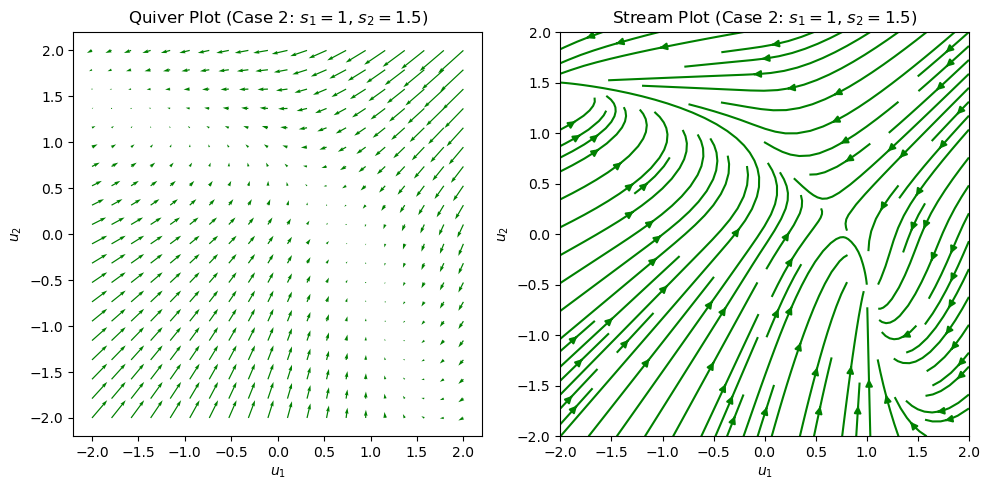

In [3]:
### CODE FOR YOUR PLOTS HERE ###

# Case 2: s1 = 1, s2 = 1.5
s1, s2 = 1, 1.5
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u = np.array([X[i, j], Y[i, j]])
        du = system(u, s1, s2)
        U[i, j], V[i, j] = du

# Quiver and Stream Plot for Case 2
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.quiver(X, Y, U, V, color="green")
plt.title("Quiver Plot (Case 2: $s_1=1$, $s_2=1.5$)")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")

plt.subplot(1, 2, 2)
plt.streamplot(X, Y, U, V, color="green")
plt.title("Stream Plot (Case 2: $s_1=1$, $s_2=1.5$)")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")

plt.tight_layout()
plt.show()

### CODE FOR YOUR PLOTS HERE ###

**Interpretation:** 


<div class="alert alert-block alert-info"> 
The system acts as a decision mechanism, with the relative strengths of \( s_1 \) and \( s_2 \) determining the asymptotic behavior.

- When \( s_1 > s_2 \), the dynamics favor the direction of \( u_1 \), leading to higher activity for \( u_1 \) and suppression of \( u_2 \).
- Conversely, when \( s_2 > s_1 \), the system favors \( u_2 \).
- These dynamics represent a competition between inputs, typical in neural networks modeling inhibitory interactions, where the stronger input dominates and suppresses the weaker one. This behavior aligns with decision-making processes where one option inhibits the other based on relative strength.
</div>

#### 2.5
Now set $s_1=s_2=1$, $c=-2$. Plot again the vector field. How you you explain the behaviour? In particular, how do you explain the result when taking into account the system matrix' eigenvalues?

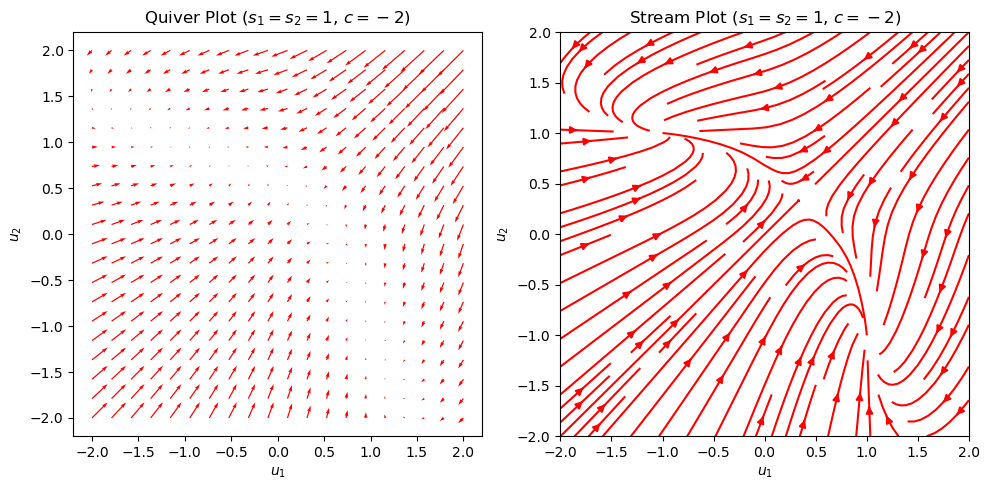

In [4]:
### CODE FOR YOUR PLOTS HERE ###

# Define the system of equations
def system(u, s1, s2, c):
    u1, u2 = u
    du1 = -u1 + c * max(u2, 0) + s1
    du2 = -u2 + c * max(u1, 0) + s2
    return np.array([du1, du2])

# Generate the grid
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Set s1 = s2 = 1, c = -2
s1, s2, c = 1, 1, -2
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u = np.array([X[i, j], Y[i, j]])
        du = system(u, s1, s2, c)
        U[i, j], V[i, j] = du

# Plotting the vector field
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.quiver(X, Y, U, V, color="red")
plt.title("Quiver Plot ($s_1 = s_2 = 1$, $c = -2$)")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")

plt.subplot(1, 2, 2)
plt.streamplot(X, Y, U, V, color="red")
plt.title("Stream Plot ($s_1 = s_2 = 1$, $c = -2$)")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")

plt.tight_layout()
plt.show()

### CODE FOR YOUR PLOTS HERE ###

**Explanation:** 

<div class="alert alert-block alert-info"> 
When setting s1=s2=1 and c=−2, we are introducing negative inhibition, which fundamentally changes the dynamics of the system.
With c = -2 , this inhibition becomes negative excitation, meaning that instead of damping activity, the interactions between u_1  and u_2 amplify each other in certain regions, potentially leading to unstable or oscillatory behavior, as also indicated by having,

- One negative eigenvalue λ = -3 , indicating contraction along one direction.
- but the other eigenvalue is positive λ = 1 , indicating expansion along another direction.

This mixed eigenvalue sign suggests saddle behavior; trajectories are attracted along one axis and repelled along another. This aligns with the observed instability and divergence in the quiver and stream plots.
</div>


#### 2.6
Replace the linear threshold function $[\cdot]_+$ by a step treshold function given by
$$
1(x) = \begin{cases} 0, & x \leq 0  \\ 1, & x > 0\end{cases}.
$$

Set $s_1=s_2=1$. Analyze the fixed points and eigenvalues for each quadrant like in 2.3 for $c=2$ and $c=-2$.

Plot the vector fields. Can you explain the difference in the the system's behaviour with a linear threshold and
with a step threshold function?

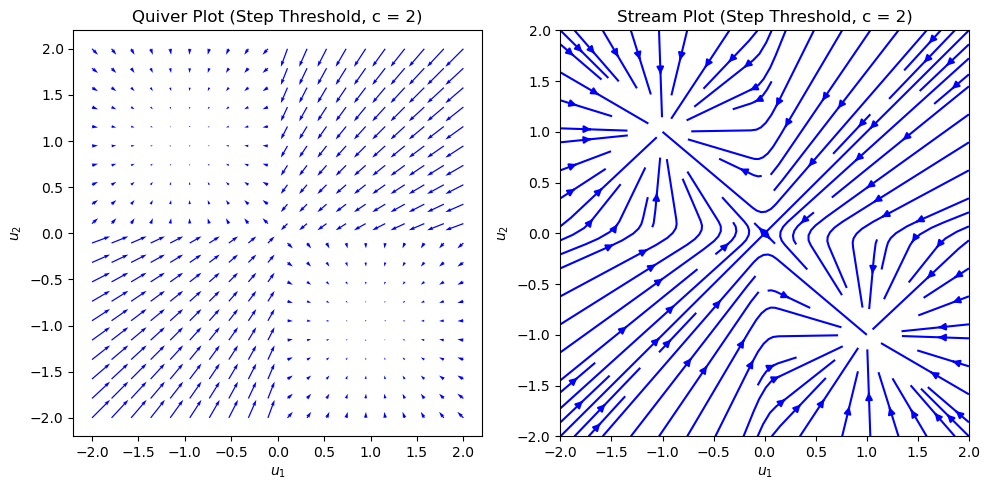

In [5]:
### CODE FOR YOUR PLOTS HERE ###

# Step threshold function
def step_threshold(x):
    return np.where(x > 0, 1, 0)

# Define the system
def system_step(u, s1, s2, c):
    u1, u2 = u
    du1 = -u1 - c * step_threshold(u2) + s1
    du2 = -u2 - c * step_threshold(u1) + s2
    return np.array([du1, du2])

# Generate the grid
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Parameters
s1, s2, c = 1, 1, 2  # Try c = -2 as well
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u = np.array([X[i, j], Y[i, j]])
        du = system_step(u, s1, s2, c)
        U[i, j], V[i, j] = du

# Plotting the vector field
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.quiver(X, Y, U, V, color="blue")
plt.title(f"Quiver Plot (Step Threshold, c = {c})")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")

plt.subplot(1, 2, 2)
plt.streamplot(X, Y, U, V, color="blue")
plt.title(f"Stream Plot (Step Threshold, c = {c})")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")

plt.tight_layout()
plt.show()

### CODE FOR YOUR PLOTS HERE ###

**Explanation:** 

<div class="alert alert-block alert-info"> 
The difference can be explained by that the step threshold creates discrete regions of flow due to the binary nature of the threshold function, and the system becomes less smooth making transitions between quadrants abrupt compared to the linear threshold function.
</div>